<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">20221 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Gerson Villalba Arana
</div>

# PEC 1: Preparación de datos

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos en el **módulo 1**, donde nos centraremos en como aplicar diferentes técnicas para la carga y preparación de datos:

1. Carga de un conjunto de datos
2. Análisis de los datos
    - Análisis estadístico básico
    - Análisis exploratorio de los datos
3. Reducción de la dimensionalidad
4. Entrenamiento y test

<u>Consideraciones generales</u>: 

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 0. Carga de librerías

En la siguiente celda se deben cargar todas las librerías necesarias para la ejecución de la actividad. Se debe indicar y justificar el uso de librerías adicionales.

**Nota**: Actualizamos la librería *scikit-learn* para poder cargar el dataset sin normalizar (que se introdujo en la versión 1.1 de la librería).

In [1]:
!conda install -y scikit-learn=1.1

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
# Librerías básicas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

## 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). 

Este conjunto de datos se puede descargar de Internet o puede ser cargado directamente de la librería `scikit-learn`, que incorpora un conjunto de [_datasets_](https://scikit-learn.org/stable/datasets.html) muy conocidos y empleados para minería de datos y aprendizaje automático.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Cargad el conjunto de datos **Diabetes** y mostrad:
- El número y nombre de los atributos
- El número de filas del conjunto de datos
- Verificad si hay _missing values_ y, en caso afirmativo, indicad en qué columnas se encuentran

In [3]:
dataset = datasets.load_diabetes(as_frame=True, scaled=False)

In [4]:
X = dataset.data
y = dataset.target
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
print(f'Número de elementos en el dataset: {X.shape[0]}')
print(f'Número de atributos totales: {X.shape[1]}')
print(f'Nombre de los atributos: {X.columns.values}')

Número de elementos en el dataset: 442
Número de atributos totales: 10
Nombre de los atributos: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


Con el métrodo .info() podemos obtener la misma información de forma más cómoda.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Con el mismo método .info() podemos ver cómo no hay nungun valor nulo en ningún atributo, ya que en todos ellos el número de no nulos es de 442 elementos. Lo mismo podríamos obtener de la siguiente forma, contando el número de NAs (*missing values*):

In [7]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Realizad un análisis estadístico básico, siguiendo los criterios descritos a continución:
- En el caso de las **variables categóricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad la frecuencia
    - Haced un gráfico de barras
- En el caso de las **variables numéricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad estadísticos descriptivos básicos, como la media, mediana, desviación estándard, etc.
    - Haced un histograma de valores
    
**Notas**:
- Podéis utilizar la librería `pandas` y sus funciones `describe` y  `value_counts`, así como las funciones  `bar` e `hist` de la librería `matplotlib`.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Según la descripción del dataset, los atributos son los siguientes:

* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

Según la descripción, todos los atributos son numéricos a excepción del sexo, que sería categórico (binario). Sin embargo, en el dataframe aparece como flotante. Comprobamos los valores únicos de esta variable:

In [9]:
X['sex'].unique()

array([2., 1.])

Vemos como la variable *sex* sólo tiene dos valores posibles. Sin embargo, siendo estos 1 y 2 no tenemos idea a cuál de los dos sexos pertenece cada uno. Cambiamos el tipo de la variable a booleano True/False (sin saber a qué sexo corresponden estos valores, ya que no tenemos esa información).

In [10]:
X['sex'] = X['sex'] > 1.5
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    bool   
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: bool(1), float64(9)
memory usage: 31.6 KB


C:\Users\gvillalba\AppData\Local\Temp\ipykernel_14448\3526253516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'] > 1.5


Comprobamos la frecuencia de la variable categórica *sex*:

In [11]:
X['sex'].value_counts()

False    235
True     207
Name: sex, dtype: int64

Hacemos un gráfico de barras para mostrar la misma información:

In [12]:
# Set Seaborn aesthetics
# Default matplotlib params
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['lines.linewidth'] = 2
plt.style.use('ggplot')

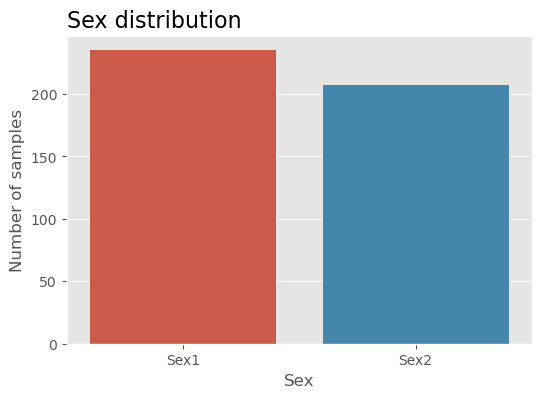

In [13]:
ax = sns.countplot(x='sex', data=X)
ax.set_title('Sex distribution', fontsize=16, loc='left')
ax.set_ylabel('Number of samples')
ax.set_xlabel('Sex')
ax.set_xticklabels(['Sex1', 'Sex2'])
plt.show()

Vemos las estadísticas básicas de las variables numéricas:

In [14]:
X.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


De estas estadísticas básicas podemos concluir que los atributos tienen escalas de valores muy distintas.

Realizamos a continuación el histograma de todas las variables numéricas.

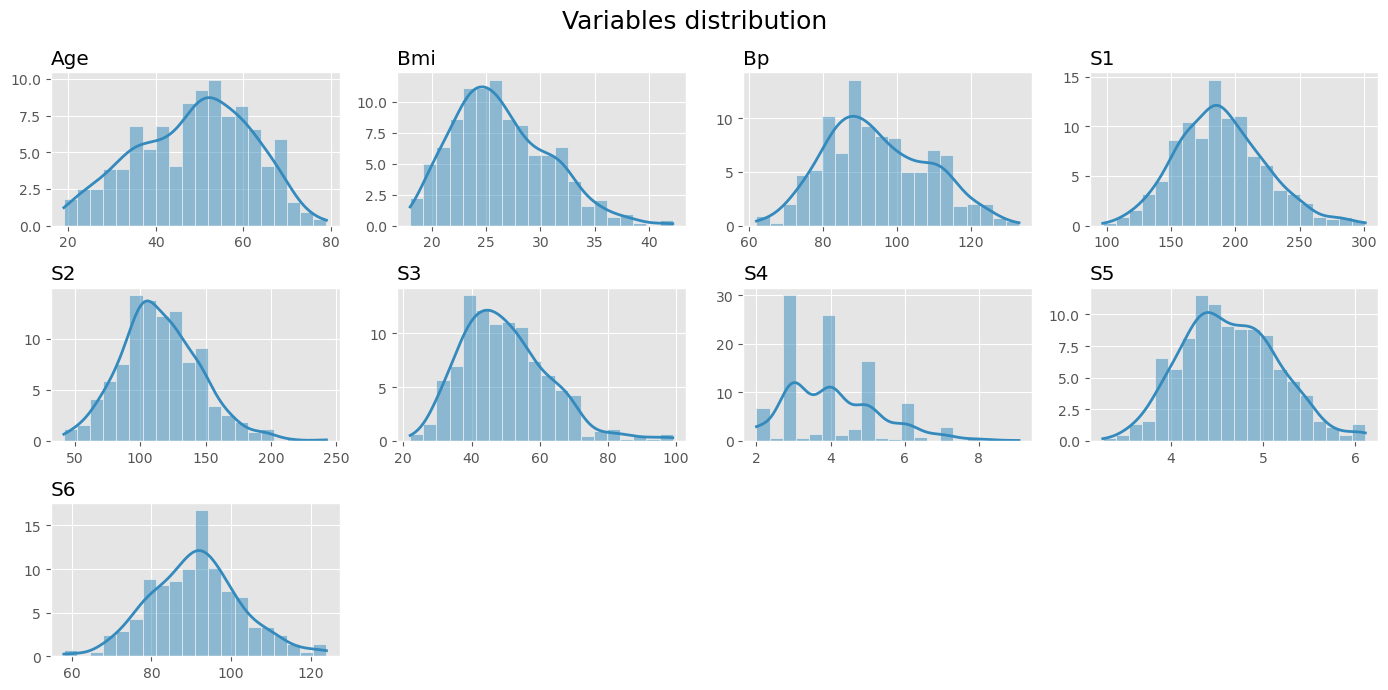

In [15]:
fig, axes = plt.subplots(3,4, figsize=(14,7))
for ax in axes.flatten():
    ax.set_axis_off()

for feat, ax in zip(X.columns.drop('sex'), axes.flatten()):
    sns.histplot(data=X[feat], bins=20, kde=True, stat="percent", ax=ax)
    ax.set_title(feat.title(), loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_axis_on()

fig.suptitle('Variables distribution', fontsize=18)
fig.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Comentad los resultados obtenidos.

De la variable *sex* podemos concluir que se trata de una variable categórica bastante balanceada, pues no hay grandes diferencias en el número de muestras presentes de ambas categorías.

En cuanto a las variables numéricas, se puede observar como tienen un rango de valores posibles muy diferente. Además, viendo el histograma podemos decir como la mayoría de ellas (a excepción de *s4*) siguen una distribución que no dista mucho de la normal, si bien alguna de ellas tienen las colas cortadas (*bmi*, *age*).

## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de los atributos con la variable respuesta, mediante gráficos y analizando las correlaciones de los atributos numéricos.

In [16]:
response = "target"
cat_feats = "sex"
num_feats = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
print('Respuesta (target)    :', response)
print("Atributos categóricos :", cat_feats)
print("Atributos numéricos   :", num_feats)

Respuesta (target)    : target
Atributos categóricos : sex
Atributos numéricos   : ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Calculad y mostrad la correlación entre todos los atributos numéricos y la variable de respuesta (o variable objetivo).

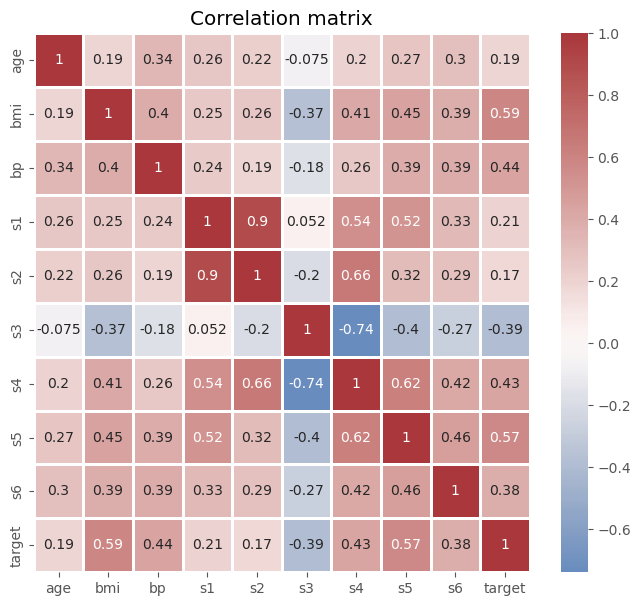

In [17]:
complete_df = pd.concat([X, y], axis=1)
plt.figure(figsize=(8,7))
corr_matrix = complete_df.drop(cat_feats, axis=1).corr()
ax = sns.heatmap(corr_matrix, center=0, linewidths=2, cmap="vlag", annot=True)
ax.set_title('Correlation matrix')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Representad gráficamente las relaciones entre todas las parejas de las variables numéricas (sin incluir la variable respuesta) del conjunto de datos. 

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre los pares de variables.

**Notas**:
- Podéis usar la función `pairplot` de la librería `seaborn`.

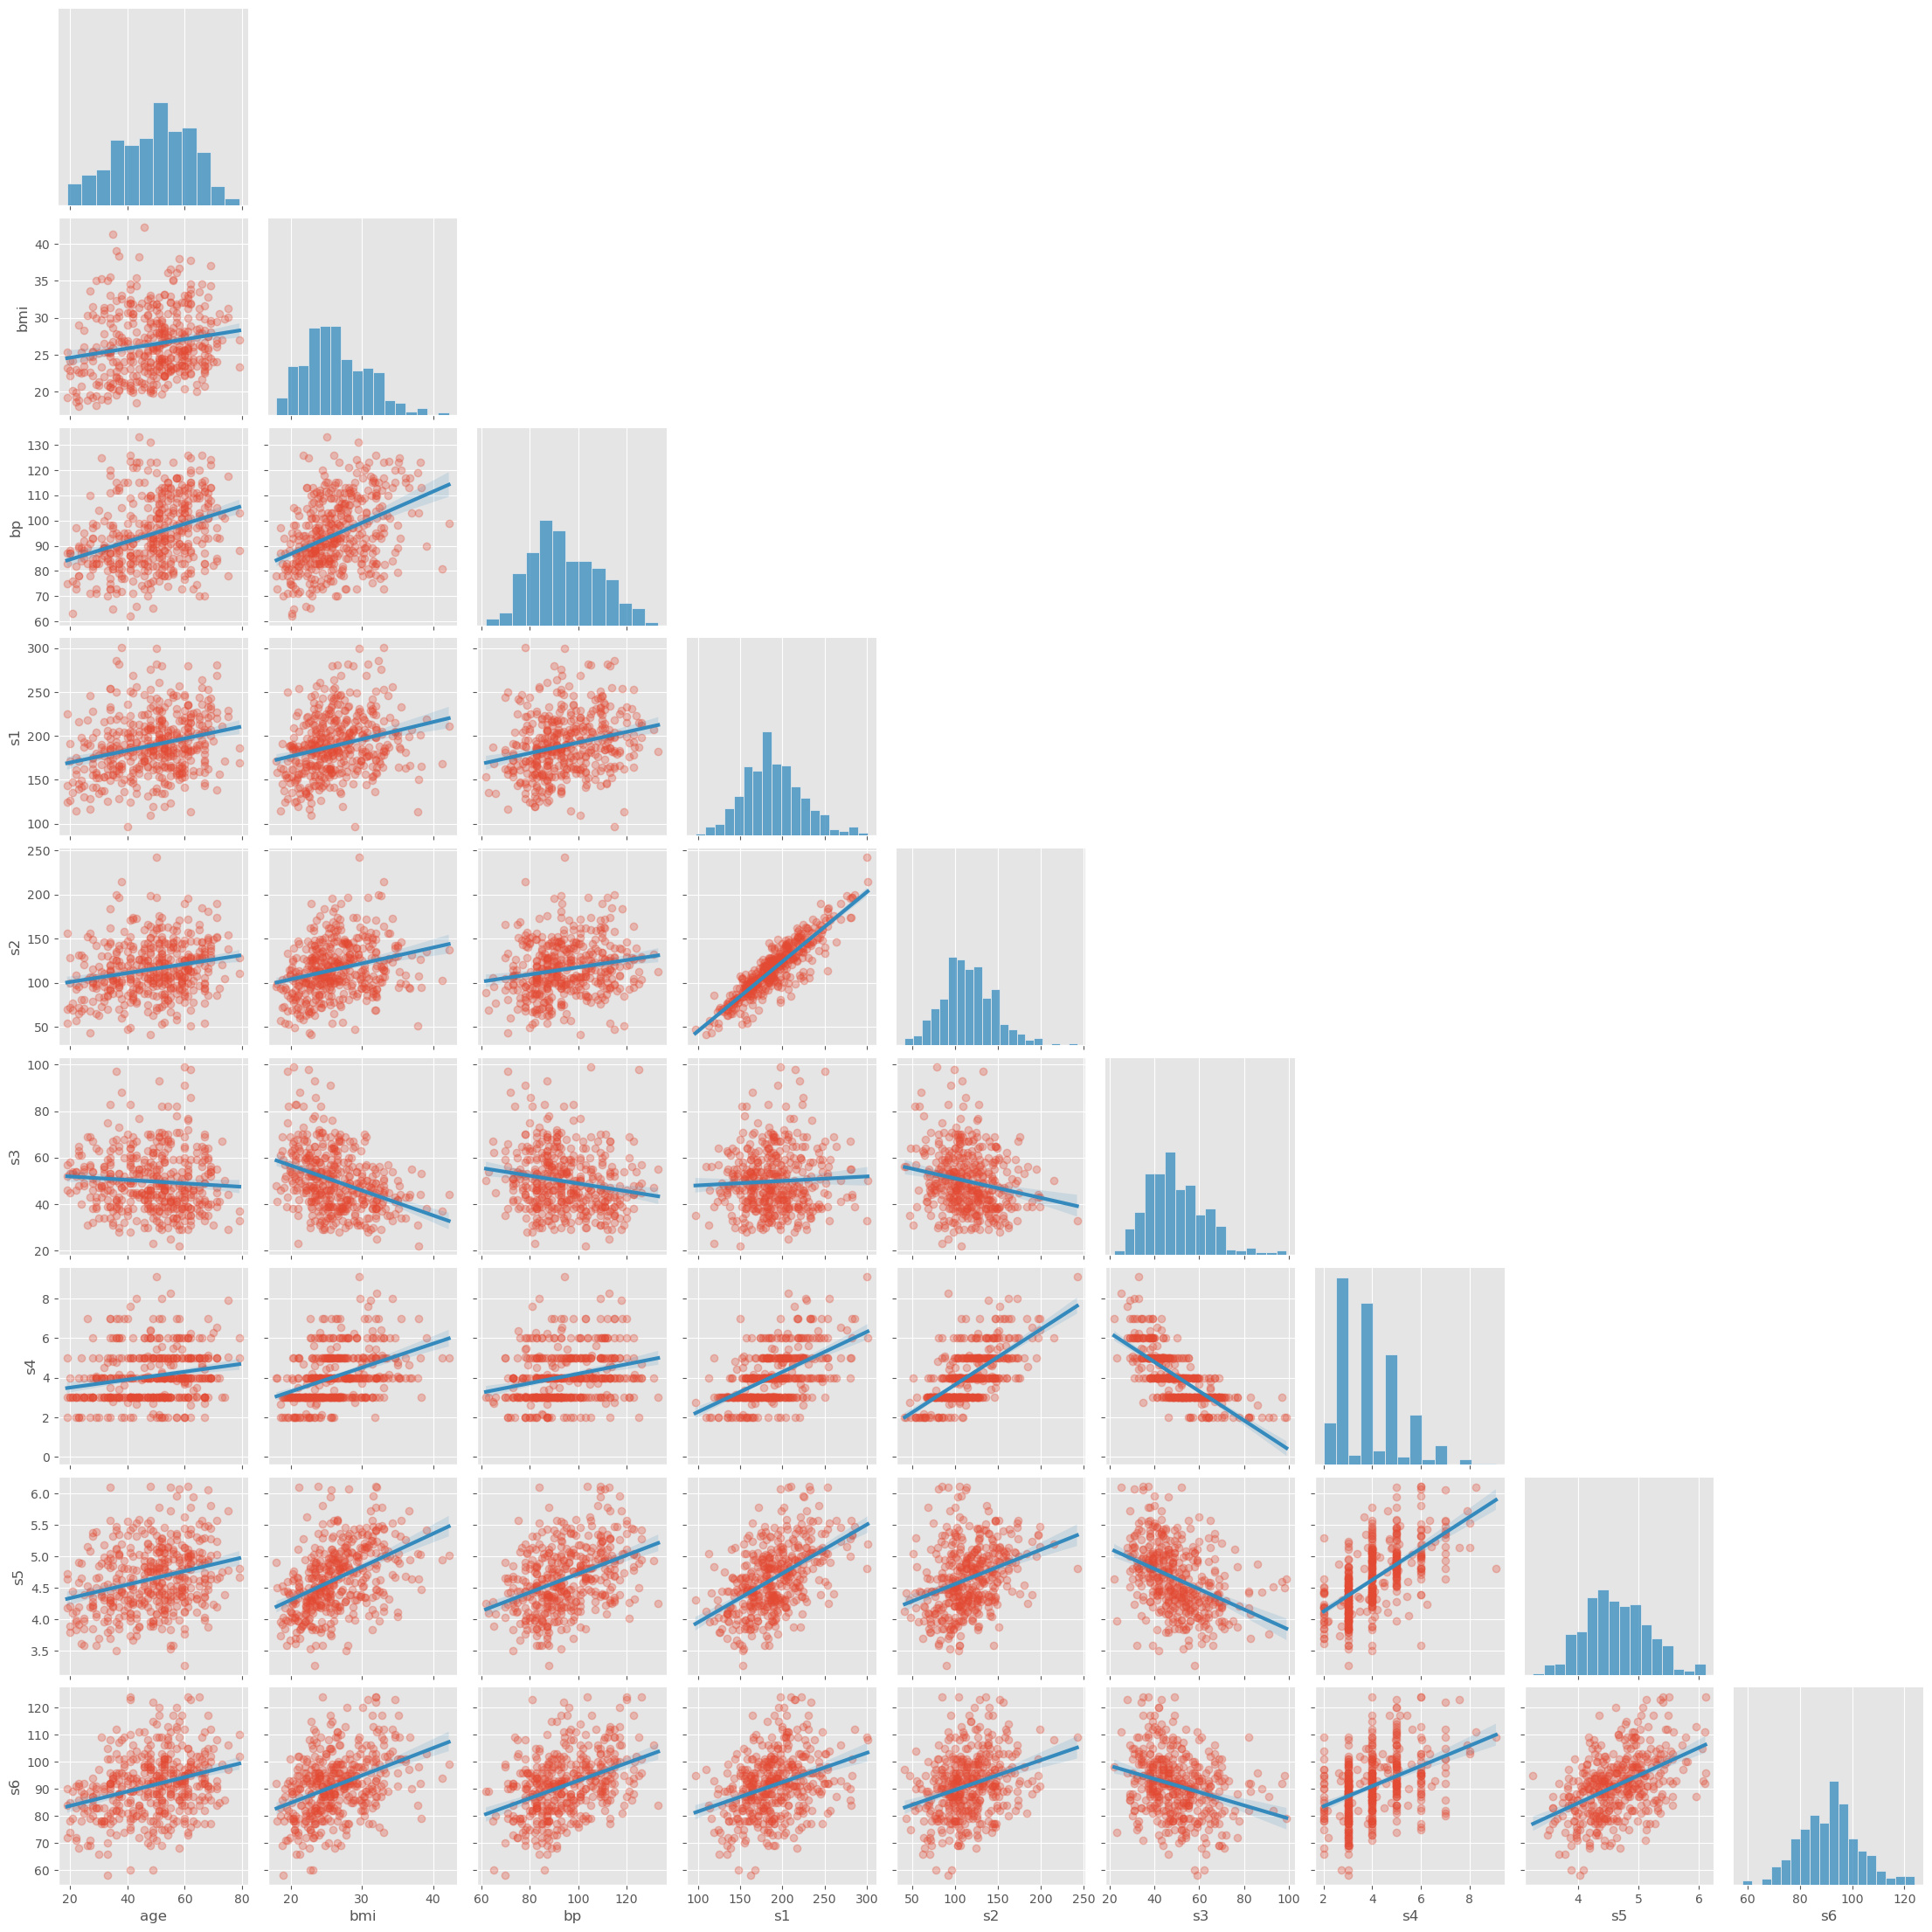

In [18]:
sns.pairplot(X[num_feats], diag_kind="hist", kind='reg', corner=True, plot_kws={'scatter_kws': {'alpha': 0.3}, 'line_kws': {'color':'#348ABD'}})
plt.show()

Podemos ver como hay variables independientes con gran correlación entre ellas, como ocurre con *s1* y *s2*, lo cual nos indica que podríamos realizar alguna tranformación linal y ser capaces de reducir la dimensionalidad sin perder información. Además, tener variables de entrada fuertemente correladas nos puede causar problemas de multicolinealidad.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Identificad los 2 atributos que tienen una **correlación más fuerte** con la variable de respuesta, y los 2 con una **correlación más débil** (considerando el coeficiente de correlación mayor o menor en valor absoluto). 

Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 4 atributos identificados, un _scatter plot_ con el atributo en el eje X y la respuesta en el eje Y. Además, en cada gráfico añadid la representación de una regresión lineal que aproxime los puntos.

**Notas**: 
- Podéis usar la función `regplot` de la librería `seaborn`.

Identificamos las dos variables con mayor y menor correlación en valor absuluto con la variable dependiente. También nos podríamos fijar en la matriz de correlaciones generada anteriormente. 

In [19]:
two_largest = corr_matrix['target'].drop('target').apply(abs).nlargest(2).index.to_list()
two_smallest = corr_matrix['target'].drop('target').apply(abs).nsmallest(2).index.to_list()
print('Two largest correlations with target are: ', two_largest)
print('Two smallest correlations with target are: ', two_smallest)

Two largest correlations with target are:  ['bmi', 's5']
Two smallest correlations with target are:  ['s2', 'age']


Vemos cómo los valores absolutos de correlación mayores con la variable objetivo *target* están con *bmi* y *s5*. De igual manera, las correlaciones menores en valor absoluto se dan con *s2* y *age*. En este caso todas ellas tienen correlación positiva con la variable dependiente *target*. Representamos estas variables frente a la variable *target* con su recta de regresión:

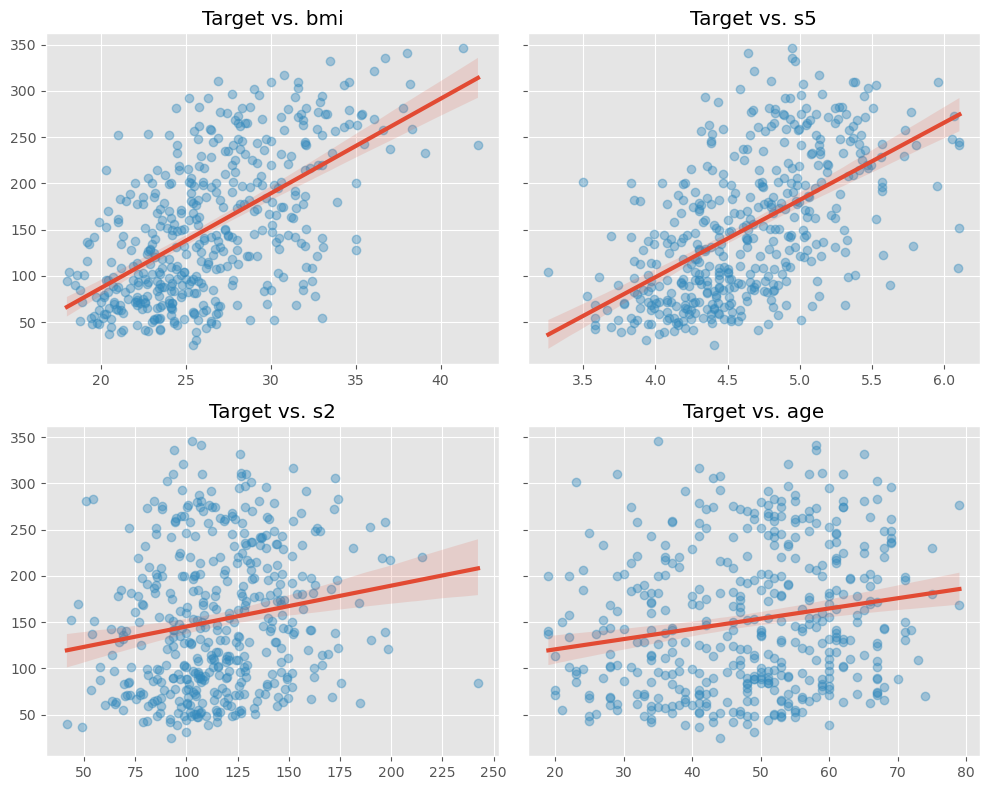

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=True)
for feat, ax in zip(two_largest+two_smallest, axes.flatten()):
    sns.regplot(x=feat, y='target', data=complete_df, scatter_kws={'alpha':0.4, 'color':'#348ABD'}, ax=ax)
    ax.set_title(f'Target vs. {feat}')
    ax.set_ylabel('')
    ax.set_xlabel('')
fig.tight_layout()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.

Efectivamente, se puede ver claramente cómo los dos atributos con una mayor correlación con la variable dependiente, *bmi* y *s5*, tienen una pendiente positiva bastante fuerte cuando las representemos frente a la variable objetivo en un *scatter plot*. La recta de regresión por supuesto nos dice la mismo, con una pendiente considerable.

Por el contrario, en los dos atributos con menor correlación en valor absoluto, *age* y *s2*, es más complicado ver una pendiente clara cuando los representamos frente a la variable objetivo, y en este caso la recta de regresión sale mucho más plana.

# 3. Reducción de la dimensionalidad (3 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones, pero que contengan la máxima información posible presente en los atributos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes acciones:
- Aplicad el método de reducción de la dimensionalidad **Principal Component Analysis** (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.

- Generad un **gráfico** con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes X e Y, el valor de la respuesta (_target_) usando la escala de colores. El objetivo es visualizar la variación del atributo objetivo en función de los valores de las componentes principales generadas.

**Nota**: 
- Vigilad de no incluir la variable objetivo en la reducción de dimensionalidad, dado que queremos poder explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.
- No es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de `scikit-learn`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

Como hemos cargado el dataset sin normalizar y por lo tanto tenemos escalas muy diferentes en los atributos, no podemos aplicar directamente PCA. Esto es así porque las diferentes escalas de datos presentes sesgarían el algoritmo para dar mayor peso a aquellas variables con mayor rango, lo que invalidaría su resultado. Aplicamos por lo tanto una estandarización de los datos previa al analisis de componentes principales. Para ello, importamos *Pipeline* y *StandardScaler* de la misma librería Scikit-Learn.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_pca = 2

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_pca))])
pca_comp = pipeline.fit_transform(X)
pca_dict = {f'pca{i+1}':pca_comp[:,i] for i in range(n_pca)}
pca_dict['target'] = y
pca_df = pd.DataFrame(pca_dict)
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    442 non-null    float64
 1   pca2    442 non-null    float64
 2   target  442 non-null    float64
dtypes: float64(3)
memory usage: 10.5 KB


A partir de la transformación PCA, podemos comprobar también el porcentaje de varianza de los datos originales que se conserva en los datos tras realizar la tranformación y quedarnos sólo con las dos primeras componentes.

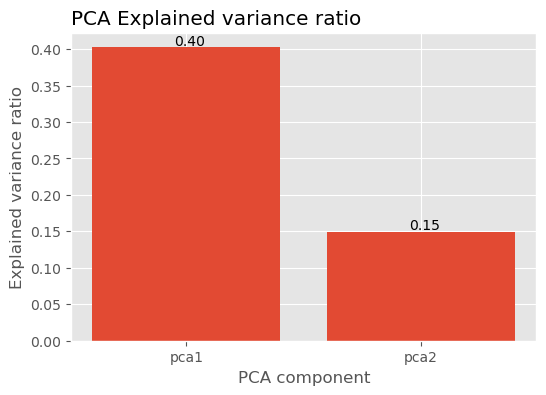

In [22]:
pca_var = pipeline['pca'].explained_variance_ratio_
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x=range(n_pca), height=pca_var)
ax.set_xlabel('PCA component')
ax.set_ylabel('Explained variance ratio')
ax.set_title('PCA Explained variance ratio', loc='left')
ax.set_xticks(list(range(n_pca)))
ax.set_xticklabels(pca_df.columns.drop('target'))

for i, v in enumerate(pca_var):
    ax.text(i-0.05, v+0.003, f'{v:.2f}')

plt.show()

Podemos ver cómo sólamente con la primer componente ya explicamos el 40% de la varianza original en los datos, un valor bastante alto. Con las dos primeras componentes que nos quedamos, podemos explicar el 55% de la varianza original, por lo que retenemos más del 50% de la información con sólamente 2 variables en lugar de las 9 iniciales. El haber reducido a sólo dos variables nos permite dibujar los puntos en un gráfico, que hacemos a continuación.

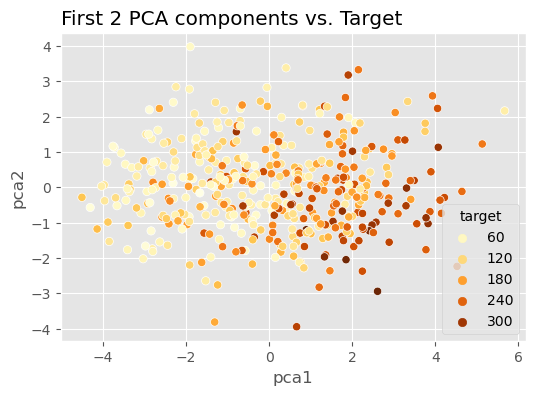

In [23]:
palette = sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.scatterplot(x='pca1', y='pca2', hue='target', data=pca_df, palette=palette)
ax.set_title('First 2 PCA components vs. Target', loc='left')
plt.show()

Podemos ver claramente como estas dos primeras componentes, y en especial la primera, determina bastante bien el valor de la variable objetivo *target* (la correlación es alta), ya que la mayoría de los valores altos de esta variable se concentran a la derecha del gráfico, donde *pca1* es alto.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes operaciones:
- Repetid la reducción de dimensionalidad, pero en este caso usando **TSNE**. Podéis encontrar más información sobre este algoritmo en el link: https://distill.pub/2016/misread-tsne/
- Igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes X e Y, el valor de la respuesta (_target_) usando una escala de colores.

**Nota**:
- No es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de `scikit-learn`.
- A parte de especificar el número de componentes, probad a usar los parámetros `learning_rate` y `perplexity`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

In [24]:
import warnings
warnings.filterwarnings('ignore')

n_comp = 2

tsne_pipe = Pipeline([('scaling', StandardScaler()), ('tsne', TSNE(n_components=n_comp, perplexity=50, random_state=seed))])
tsne_comp = tsne_pipe.fit_transform(X)
tsne_dict = {f'comp{i+1}':tsne_comp[:,i] for i in range(n_comp)}
tsne_dict['target'] = y
tsne_df = pd.DataFrame(tsne_dict)
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   comp1   442 non-null    float32
 1   comp2   442 non-null    float32
 2   target  442 non-null    float64
dtypes: float32(2), float64(1)
memory usage: 7.0 KB


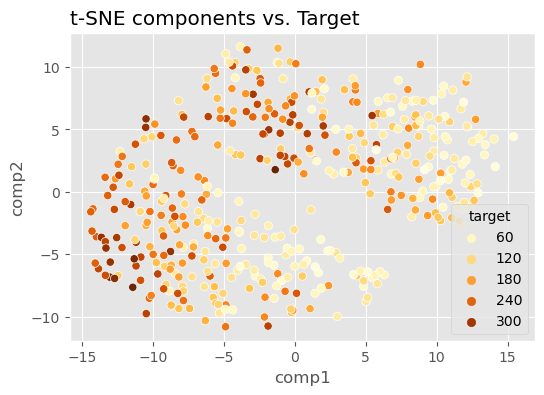

In [25]:
ax = sns.scatterplot(x='comp1', y='comp2', hue='target', data=tsne_df, palette=palette)
ax.set_title('t-SNE components vs. Target', loc='left')
plt.show()

Realizamos a continuación un paramétrico variando los parámetros *perplexity* y *learning_rate* de t-SNE entre un arango de valores razonable dentro de los habituales.

Creating 5 x 5 grid to plot 25 combinations.


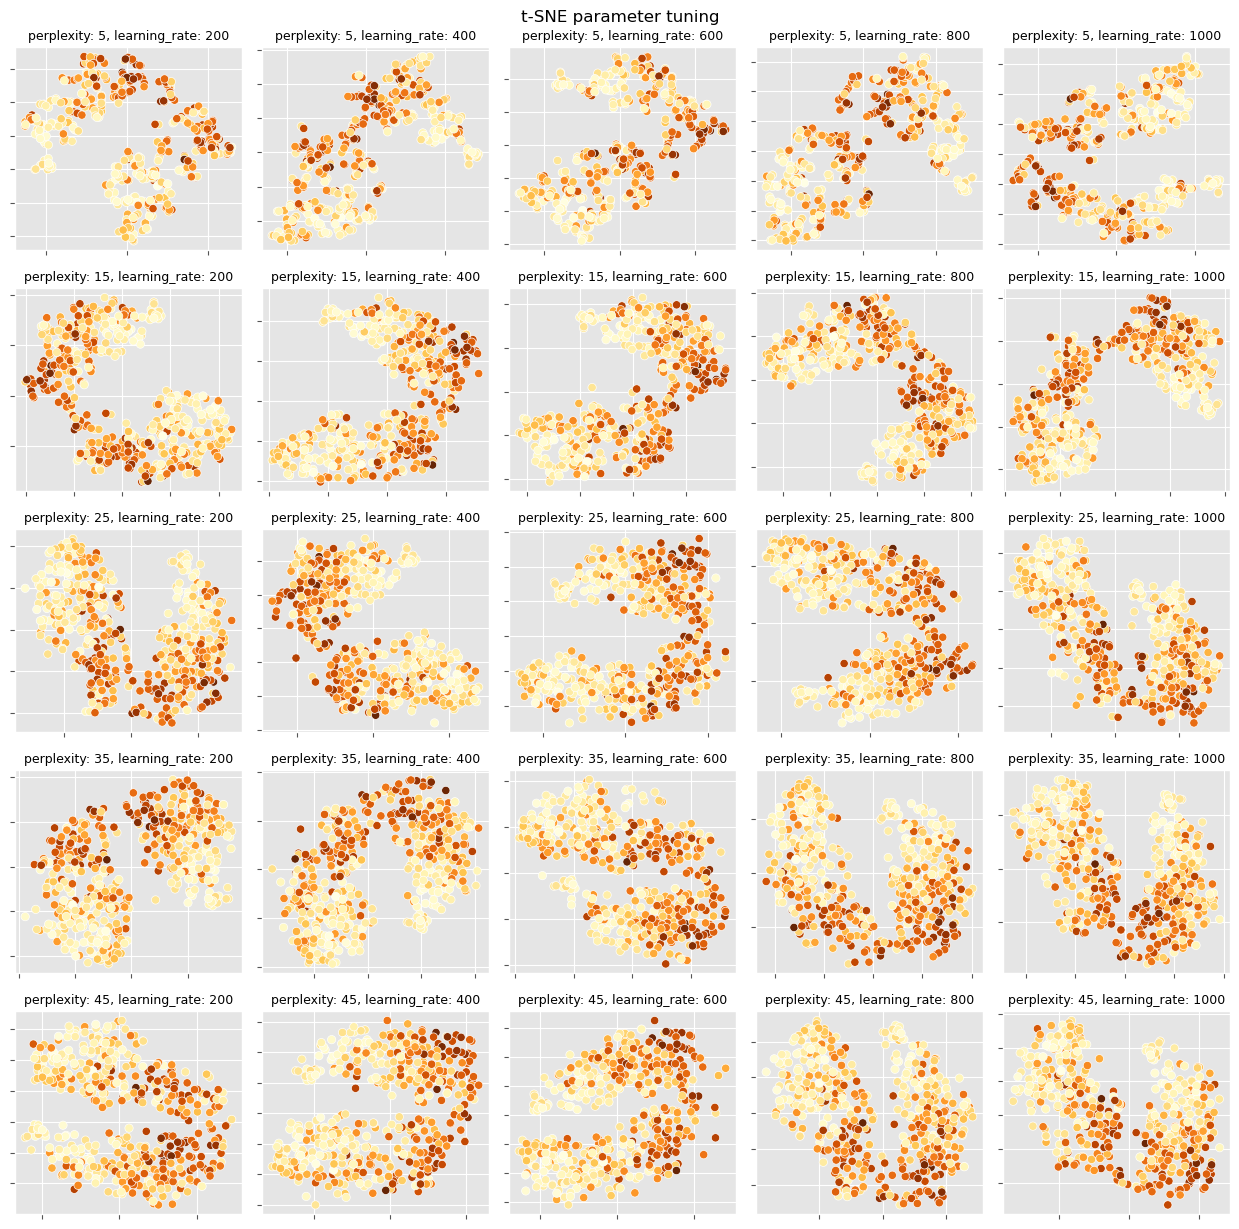

In [26]:
parameters = {'perplexity' : np.arange(5,51,10),
              'learning_rate' : np.arange(200,1001,200)
             }

def test_tsne(X: pd.DataFrame, y: pd.Series, parameters: dict):
    combinations = np.array(np.meshgrid(*[mat for mat in parameters.values()])).T.reshape(-1,2)
    params_list = [dict(zip(parameters.keys(),comb)) for comb in combinations]
    n_cols=5
    n_rows=len(combinations) // n_cols if len(combinations) % n_cols == 0 else len(combinations) // n_cols +1
    print(f'Creating {n_rows} x {n_cols} grid to plot {len(combinations)} combinations.')
    
    X_norm = StandardScaler().fit_transform(X)
    
    fig, axes = plt.subplots(n_cols, n_rows, figsize=(2.5*n_cols,2.5*n_rows))
    
    for param, ax in zip(params_list, axes.flatten()):
        tsne = TSNE(n_components=2, random_state=seed, **param)
        tsne_comp = tsne.fit_transform(X_norm)
        tsne_dict = {f'comp{i+1}':tsne_comp[:,i] for i in range(n_comp)}
        tsne_df = pd.DataFrame(tsne_dict)
        tsne_df['target'] = y
        sns.scatterplot(x='comp1', y='comp2', hue='target', data=tsne_df, legend=False, palette=palette, ax=ax)
        ax.set_title(', '.join([f'{k}: {v}' for k, v in param.items()]), fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    
    fig.suptitle(f't-SNE parameter tuning')
    fig.tight_layout()
    plt.show()


test_tsne(X, y, parameters)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los dos gráficos, responded a las siguinetes preguntas:
- ¿Creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación del atributo objetivo y visualizarlo de forma adecuada? 
- ¿Si utilizásemos las 2 nuevas variables para predecir el valor objetivo, con cuál de los dos métodos de reducción de dimensionalidad creéis que obtendríamos los mejores resultados? ¿Por qué obtenemos resultados tan diferentes con los dos métodos?

La reducción de la dimensionalidad ha sido correcta para poder visualizar los datos en 2D, y en el caso de PCA vemos que nos hemos quedado con una varianza original decente (55%). Los resultados que se obtienen con PCA y t-SNE son muy distintos porque aunque en ambos el objetivo es reducir la dimensionalidad de los datos existentes, ambos lo llevan a cabo de forma muy diferente. PCA realiza una tranformación lineal del espacio n-dimensional de los datos originales, de forma que las dimensiones resultantes estén ordenadas en orden decreciente con respecto la variabilidad presente en los datos en dicha dimensión. De esta forma, truncando el número de dimensiones (en este caso a 2), nos quedamos con las dimensiones que mayor variabilidad representan en el conjunto de datos. Un problema importante es que por ser un algoritmo lineal, no capta las simulitudes no lineales entre estos y al representar los datos en un espacio de menor dimensionalidad, se tiende a preservar la estructura global original de los datos, que en ocasiones puede no ser una interpretación correcta. Las mayores ventajas de PCA son que es un algoritmo muy sencillo de implementar e intuitivo y que no requiere de ningún parámetro a excepción del número de componentes finales con el que nos quedamos.

t-SNE, sin embargo, sigue un método estadístico basado en la distribución t de Student para representar las distancias de todos los puntos entre ellos. El algoritmo para llevar a cabo esta tranformación es más complejo que PCA, pero tiene como principal ventaja que pueden captar las similitudes no lineales entre distintos puntos, y no sólamente las lineales como PCA, permitiendo una mucho más clara representación de los datos en el espacio de dimensionalidad reducida para casos en los que esta relación no sea lineal.

En el caso concreto que nos ocupa, ambos métodos nos ofrecen una calidad de visualización aceptable, ya que la relación que tenemos es bastante lineal (hemos visto correlaciones considerables entre variables independientes y variable dependiente). Con t-SNE vemos cómo los valores con *target* más alta tienden a concentrarse en una misma zona en el espacio de dos dimensiones, pero algo similar ocurría con PCA. Con t-SNE vemos además que variando los parámetros *perplexity* y *rearning_rate* la representación que obtenemos de los mismos datos es muy diferente, pero en todos los casos tenemos los puntos con valor *target* alto en una misma zona espacial. Por lo tanto, en base a los resultados, diría que en este caso ambos métodos funcionarían de forma similar si los utilizásemos para reducir la dimensionalidad de los atributos de entrada a 2 y utilizarlos como variables predictoras de la variable dependiente. 

Por otro lado, es curioso el hecho de que el s-SNE presenta una estructura de los puntos en dos *clusters* en la mayoría de los casos, algo que lleva a pensar que hay una estructura interna en los datos que permitiría dividirlos en dos grupos claramente diferenciados si utilizásemos un algoritmo no supervisado de *clustering*. Comprobamos que estos dos clusters se corresponden, precisamente, a ambos sexos presentes en los datos, como podemos comprobar, coloreando por sexo el caso de t-SNE con parámetros por defecto:

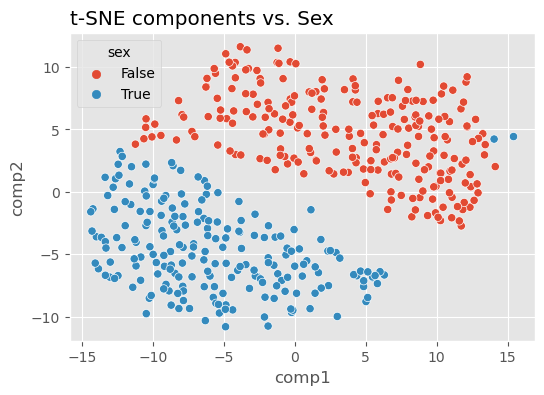

In [27]:
tsne_df['sex'] = X['sex']

ax = sns.scatterplot(x='comp1', y='comp2', hue='sex', data=tsne_df)
ax.set_title('t-SNE components vs. Sex', loc='left')
plt.show()

# 4 Entrenamiento y métricas (3 puntos)

## 4.a Regresión

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el **Random Forest** para regresión, para predecir el valor objetivo (_target_) y evaluar la precisión obtenida con el modelo.

Para eso usaremos el conjunto de datos original con todos los atributos menos la variable dependiente (target).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Usando el conjunto de datos original:
- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto MAE (la media del error absoluto), MSE (error cuadrático medio) y MAPE (porcentaje de error absoluto medio), separadamente.
- Calculad la media y la desviación estándard del error obtenido en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestRegressor` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

**Nota:** en un caso más habitual, habríamos apartado un conjunto de datos como evaluación. Sin embargo, en este caso no estamos realizando evaluación de diferentes modelos, sino sólamente comprobando el comportamiento de uno de ellos. Por otro lado, al hacer *cross validation* no necesitamos apartar un conjunto de test. Por lo tanto, no apartamos un conjunto de evaluación desde el principo, porque en este caso concreto no es necesario, y así aprovechamos el mayor número posible de datos para entrenar. Lo mismo sucede en el apartado siguiente de clasificación.

**Nota 2:** utilizamos *cross_validate* en lugar de *cross_val_score* porque la primera permite el uso directamente de varios *scores* en lugar de uno sólo. De esta forma, no tenemos que entrenar el modelo repetidas veces para evaluarlo con las diferentes métricas, sino que se entrena una vez y se calculan todas ellas. Además tiene la ventaja adicional de poder devolver también las métricas obtenidas en cada conjuto de entrenamiento. Lo mismo hacemos en el apartado siguiente de clasificación.

In [28]:
reg_score_types = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error']

rf_reg = RandomForestRegressor(n_estimators=10, random_state=seed)
reg_scores = cross_validate(rf_reg, X, y, scoring=reg_score_types, return_train_score=True, cv=5, n_jobs=-1)

In [29]:
def show_mean_std_scores(scores):
    df = pd.DataFrame(scores)
    df.columns = [col.replace('_neg', '') for col in df.columns]
    useful_cols = [col for col in df.columns if 'test' in col or 'train' in col]
    return df[useful_cols].agg(['mean', 'std']).apply(abs).T

In [30]:
show_mean_std_scores(reg_scores)

,mean,std
test_mean_absolute_error,48.291877,3.387339
train_mean_absolute_error,19.424356,0.592028
test_mean_squared_error,3600.290209,446.802257
train_mean_squared_error,682.783288,42.030678
test_mean_absolute_percentage_error,0.421703,0.047291
train_mean_absolute_percentage_error,0.166257,0.008047


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

¿A qué se deben las diferencias numéricas entre las distintas métricas?

¿Qué muestras y errores crees que pueden influir más o menos en el incremento/decremento de las distintas métricas?

Podemos extraer varias conclusiones de los resultados:
* El valor de las distintas métricas es muy diferente, algo lógico pues su cálculo es distinto.
* Los *scorers* de scikit-learn dan valores negativos, ya que son las negadas de las métricas. Esto se debe a que la implementación de los algoritmos de optimización de Scikit-Learn asume siempre que un *score* mayor es siempre mejor. Por lo tanto, aplicamos el valor absoluto para obtener la métrica.
* Los errores en los conjuntos de entrenamiento y test difieren mucho, lo que nos indica que el modelo se está sobreajustando (*overfitting*) al conjunto de entrenamiento. Esto es bastante habitual en modelos basados en árbles de decisión, y se podría solucionar regularizando el modelo utilizado, es decir, habiéndolo menos complejo limitando en número de hojas, la profundidad, etc.
* Dependiendo del tipo de problema será más óptimo minimizar una métrica u otra. Métricas como MSE intentarán minimizar los errores grandes, ya que toma el cuadrado de la diferencia entre valor real y predicho, por lo que éstos salen muy penalizados. En la métrica MAE, sin embargo no se incrementará la importancia de las diferencias grandes, sino que todas serán tratadas de igual manera, tomando el valor absoluto de la diferencia en lugar del cuadrado. La métrica MAPE, por su lado, mide el error cometido en porcentaje, por lo que se divide el valor absoluto de la distancia entre valor real y predicción entre el valor real. Al tomar el valor absoluto, tampoco dará mucha más importancia a los errores de mayor magnitud (al igual que MAE). Esta última métrica tiene el problema de que no puede utilizarse cuando tratamos con valores reales cercanos a cero, ya que el error cometido en porcentaje se va a infinito independientemente de la diferencia entre predicción y valor real, y por lo que en la práctica no es muy utilizada.

## 4.b Clasificación

Para este apartado se usará el conjunto de datos original pero como target (y) la variable "sex" (binaria, con valores 0 y 1), transformando el problema de regresión a clasificación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Genera el conjunto de variables independientes _X_ con los datos originales pero sin la variable _target_ ni _sex_ (será la nueva variable dependiente).

Genera la variable dependiente _y_ como un array de tipo _int_ que contenga el sexo asociado a cada fila para ser predicho.

Generamos los nuevos dataframes con las variables dependientes y objetivo. La variable objetivo la dejamos tal y como la teníamos porque ya la habíamos cambiado a tipo booleano anteriormente.

Como ya hemos visto que la variable *sex* está balanceada, al convertirla ahora en variable objetivo no tendremos problema por desbalanceo de clases.

In [31]:
X_clas = X.drop('sex', axis=1)
y_clas = X['sex']
y_clas.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: sex
Non-Null Count  Dtype
--------------  -----
442 non-null    bool 
dtypes: bool(1)
memory usage: 570.0 bytes


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto accuracy como roc_auc.
- Calculad la media y la desviación estándard de las métricas obtenidas en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestClassifier` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

In [32]:
clf_score_types = ['accuracy', 'roc_auc']

rf_clf = RandomForestClassifier(n_estimators=10, random_state=seed)
rf_score = cross_validate(rf_clf, X_clas, y_clas, scoring=clf_score_types, return_train_score=True, cv=5, n_jobs=-1)
show_mean_std_scores(rf_score)

,mean,std
test_accuracy,0.640220,0.026578
train_accuracy,0.982463,0.007327
test_roc_auc,0.701663,0.043937
train_roc_auc,0.999496,0.000249


De los resultados podemos concluir que el modelo está sobreajustanto (*overfitting*) los datos de entrenamiento fuertemente, ya que las métricas en el conjunto de entrenamiento ofrecen un comportamiento mucho mejor (y casi perfecto) que en el conjunto de test. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Si los valores de la columna _sex_ estuviesen desbalanceados con un 99% de ceros y un 1% de unos.

Para las dos métricas anteriores, ¿qué score obtendríamos con un modelo que siempre indicase 0?

La exactidud obtenida en ese caso sería del 99% (99% de aciertos con el modelo *dummy*), un dato que puede parecer en principio bueno, pero que realmente sólo lo es por el desbalanceo de las clases objetivo. 

Por otro lado, la ROC AUC es el área que queda bajo la curva ROC, que a su vez se define como TPR (true positive rate) vs. FPR (false positive rate), teniendo en cuenta que podemos mover el umbral de decisión de clase positiva. Sin embaro, como no tenemos un umbral de decisión que mover al clasificar siempre como 0, no podemos calcular la curva como tal, sino sólamente un punto.

$TPR = \frac{TP}{P} = \frac{99}{99} = 1$

$FPR = \frac{FP}{N} = \frac{1}{1} = 1$

Por lo tanto el punto donde se encontraría este clasificador fijo sería el (1, 1) dentro de la curva ROC. En este caso por lo tanto si miramos el TPR tenemos un score perfecto (todas las clases positivas se clasifican como tal), pero el FPR nos da un score muy malo (todas los elementos negativos se clasifican como positivos). Mirando la curva ROC por lo tanto tenemos una visión mucho más ajustada a la realidad de la bonanza de un clasificador cuando las clases están desbalanceadas que mirando la exactitud.

Para calcular la curva completa ROC debaríamos tener un clasificador que nos devuelva probabilidades y así mover el umbral de decisión entre clases, cosa que no tenemos. Si tenemos la curva ROC, además podemos calcular el área bajo su curva (ROC AUC), que se encontrará entre 0.5 (clasificador dummy, con curva ROC que es una recta de pendiente unidad) y 1 (clasificador perfecto).

## 5 Bibliografía

He reutilizado y adaptado código de dos notebooks propios de Kaggle:

https://www.kaggle.com/code/gersonvillalba/wine-eda-quality-prediction

https://www.kaggle.com/code/gersonvillalba/spaceship-titanic-eda-full-pipeline-model

Además he consultado la siguiente documentación externa:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

https://matplotlib.org/3.1.1/api/pyplot_summary.html

https://seaborn.pydata.org/index.html

https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot

https://www.themachinelearners.com/tsne/

https://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/

https://classeval.wordpress.com/simulation-analysis/roc-and-precision-recall-with-imbalanced-datasets/